In [2]:
#Import LIBRARIES
import ast
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset
from adjustText import adjust_text
import seaborn as sns
#Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#data clean up

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply( lambda x: ast.literal_eval(x) if pd.notna(x) else x)

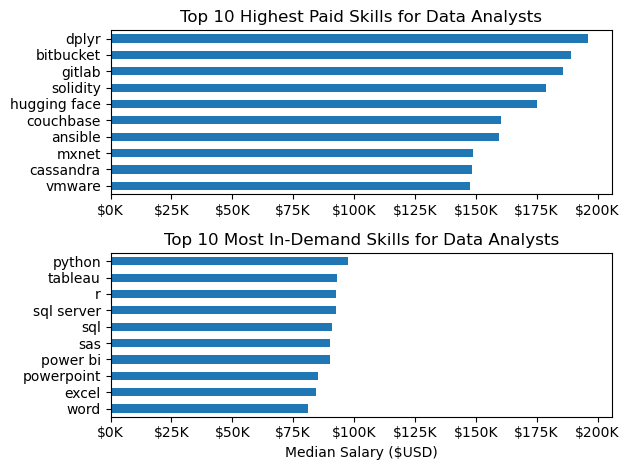

In [4]:
df_DA_US =  df[
    
    (df['job_title_short'] == 'Data Analyst')&
    (df['job_country'] == 'United States')
    
    ].dropna(subset='salary_year_avg').copy()


df_DA_US =df_DA_US.explode('job_skills')

df_DA_US_group =df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median'])

df_DA_top_pay = df_DA_US_group.sort_values(by='median', ascending=False).head(10)

df_DA_skills = df_DA_US_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)


fig, ax= plt.subplots(2,1)

df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)

ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))

df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)

ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))
ax[1].set_xlim(ax[0].get_xlim())

fig.tight_layout()

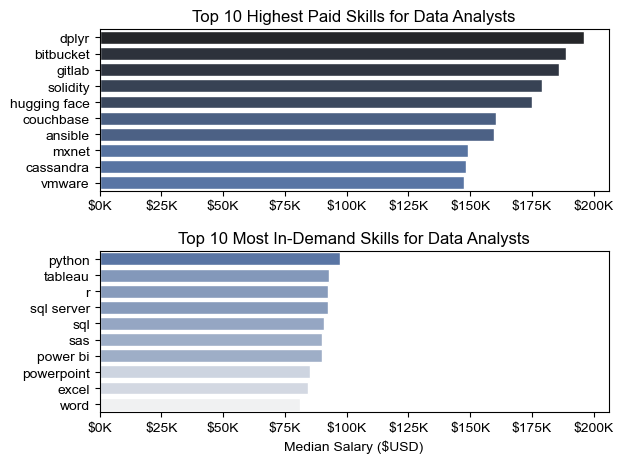

In [12]:

fig, ax= plt.subplots(2,1)

sns.set_theme(style='ticks')
# df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)

sns.barplot(data= df_DA_top_pay, x='median', y=df_DA_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r')
ax[0].legend().remove()
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))

# df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)

sns.barplot(data= df_DA_skills, x='median', y=df_DA_skills.index, ax=ax[1], hue='median', palette='light:b')
ax[1].legend().remove()
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))
ax[1].set_xlim(ax[0].get_xlim())

fig.tight_layout()

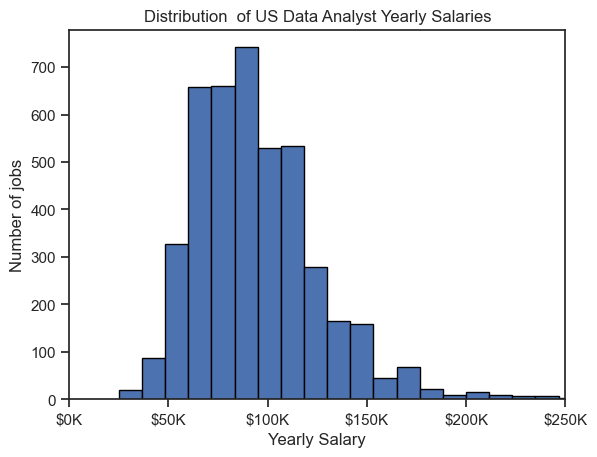

In [13]:
df_DA_US = df[
    (df['job_title_short'] == 'Data Analyst') &
    (df['job_country'] == 'United States')].copy()

df_DA_US['salary_year_avg'].plot(kind='hist', bins=30, edgecolor='black')
plt.xlim(0, 250000)

ax= plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))

plt.title('Distribution  of US Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of jobs')
plt.show()

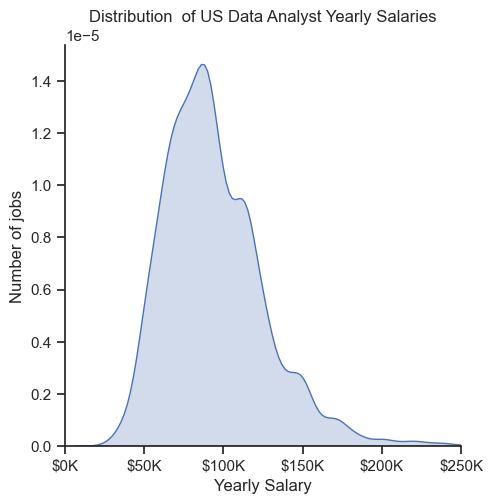

In [16]:
sns.displot(df_DA_US['salary_year_avg'], kind='kde', fill=True)


plt.xlim(0, 250000)

ax= plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))

plt.title('Distribution  of US Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of jobs')
plt.show()

C:\Users\mateo\AppData\Local\Temp\ipykernel_55728\2113027825.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


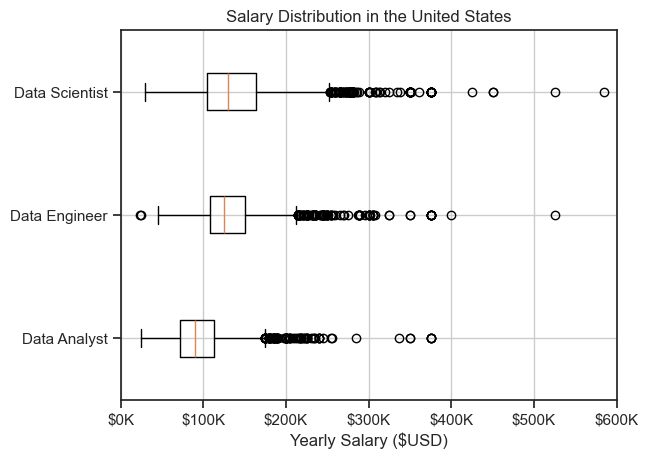

In [17]:
job_titles=[ 'Data Analyst', 'Data Engineer', 'Data Scientist']

df_US = df[
    (df['job_title_short'].isin(job_titles)) &
    (df['job_country'] == 'United States')].copy()


df_US = df_US.dropna(subset='salary_year_avg')


job_list=[df_US[df_US['job_title_short']== job_title]['salary_year_avg']        for job_title in job_titles]



plt.boxplot(job_list, labels=job_titles, vert=False)

plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
ax= plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))
plt.grid()
plt.xlim(0,600000)
plt.show()

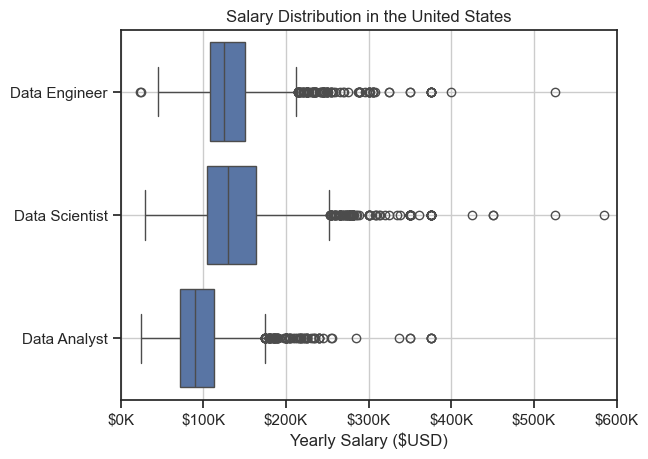

In [19]:
sns.boxplot(data=df_US, x='salary_year_avg', y='job_title_short')

plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
ax= plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))
plt.grid()
plt.xlim(0,600000)
plt.show()

In [62]:
df_DS_US =  df[
    
    (df['job_title_short'] == 'Data Analyst')&
    (df['job_country'] == 'United States')
    
    ].dropna(subset='salary_year_avg').copy()

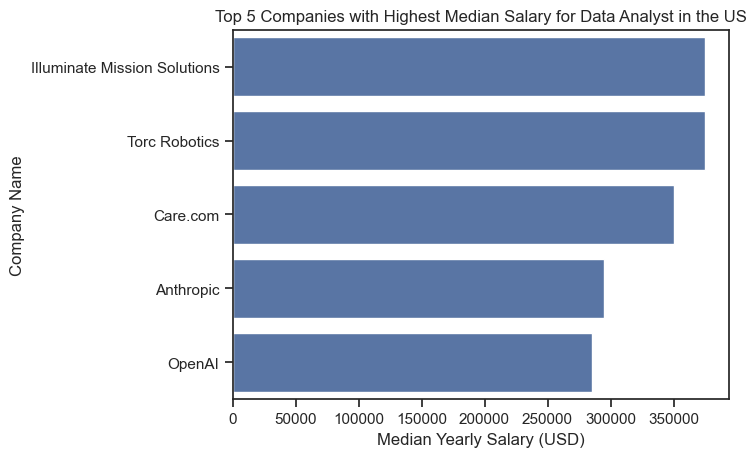

In [63]:
median_values = df_DS_US.groupby('company_name')['salary_year_avg'].median().nlargest(5).reset_index()

sns.barplot(data=median_values, x='salary_year_avg', y='company_name')         
plt.title('Top 5 Companies with Highest Median Salary for Data Analyst in the US')
plt.xlabel('Median Yearly Salary (USD)')
plt.ylabel('Company Name')
plt.show()

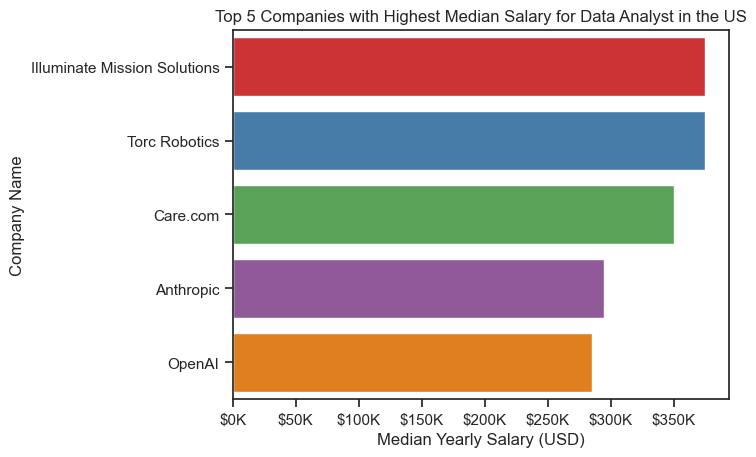

In [71]:
sns.barplot(data=median_values, x='salary_year_avg', y='company_name', hue='company_name', palette='Set1')

ax= plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))
plt.title('Top 5 Companies with Highest Median Salary for Data Analyst in the US')
plt.xlabel('Median Yearly Salary (USD)')
plt.ylabel('Company Name')
plt.show()


In [3]:
df_DS_US =  df[
    
    (df['job_title_short'] == 'Data Analyst')&
    (df['job_country'] == 'United States')
    
    ].dropna(subset='salary_year_avg').copy()

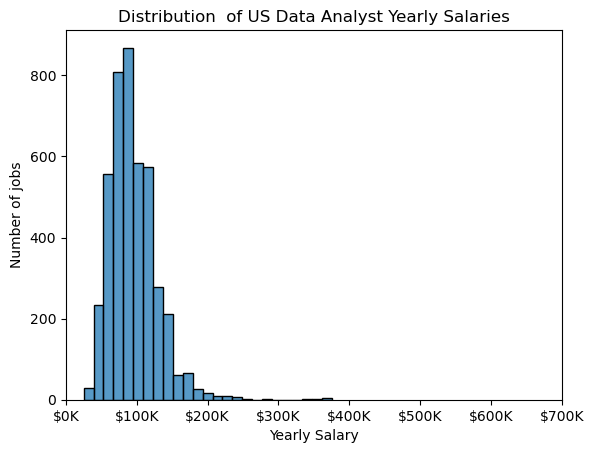

In [12]:
sns.histplot(df_DS_US['salary_year_avg'], bins=25, kde=False)
plt.xlim(0,700000)


ax= plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))

plt.title('Distribution  of US Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of jobs')
plt.show()

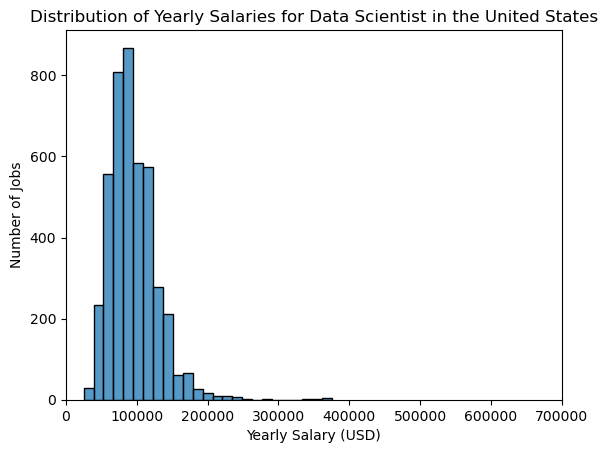

In [13]:
sns.histplot(df_DS_US['salary_year_avg'], bins=25, kde=False)
plt.title('Distribution of Yearly Salaries for Data Scientist in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Number of Jobs')
plt.xlim(0,700000)
plt.show()


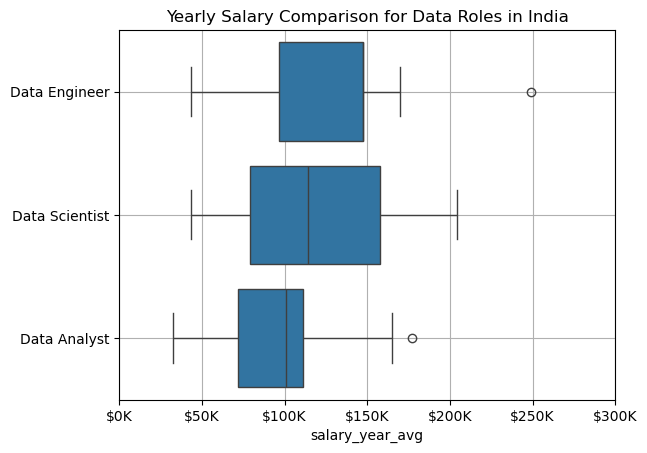

In [37]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']


df_IN= df[
    (df['job_title_short'].isin(job_titles))&
    (df['job_country']=='India')
    ].copy().dropna(subset='salary_year_avg')


salaries = [df_IN[df_IN['job_title_short'] == title]['salary_year_avg'] for title in job_titles]



sns.boxplot(data=df_IN, x='salary_year_avg', y='job_title_short')


ax= plt.gca()
plt.title('Yearly Salary Comparison for Data Roles in India')
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))
plt.grid()
plt.xlim(0,300000)
plt.ylabel('')
plt.show()

C:\Users\mateo\AppData\Local\Temp\ipykernel_34392\1413210689.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(salaries, labels=job_titles, vert=False)


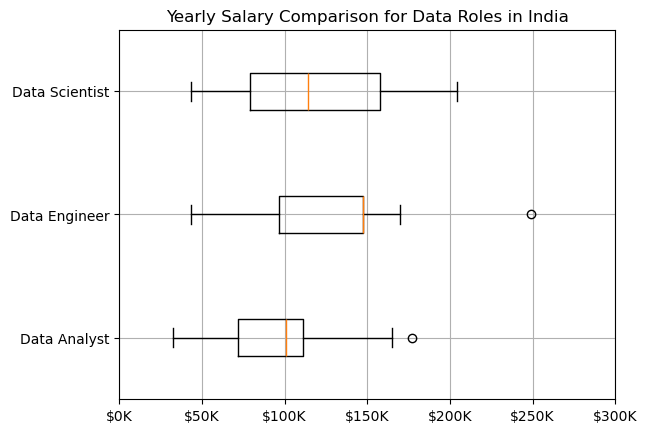

In [35]:
plt.boxplot(salaries, labels=job_titles, vert=False)
ax= plt.gca()
plt.title('Yearly Salary Comparison for Data Roles in India')
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))
plt.grid()
plt.xlim(0,300000)
plt.show()

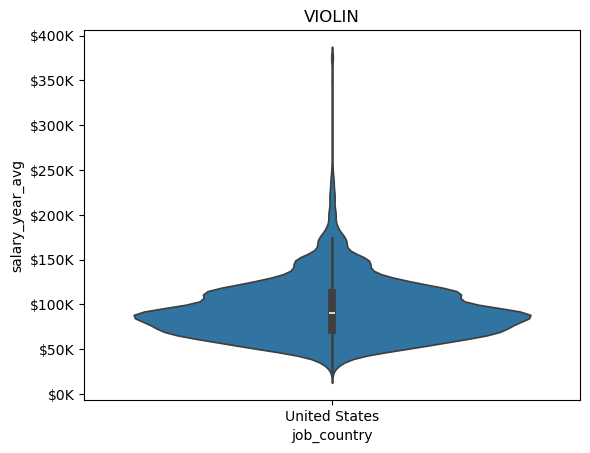

In [43]:
df_DS_US =  df[
    
    (df['job_title_short'] == 'Data Analyst')&
    (df['job_country'] == 'United States')
    
    ].dropna(subset='salary_year_avg').copy()

sns.violinplot(data=df_DS_US, x='job_country', y='salary_year_avg') 
plt.title('VIOLIN')

ax= plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
